# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: 47
* Students: Leo Capiod ; Frank Schmutz ; Harold Sussmilch ; Josef Weber
* Dataset: Flight Routes : airports and routes for ms 1

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [1]:
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [2]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [3]:
adjacency = np.load('../data/adj_matr.npy')
n_nodes = len(adjacency)

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [4]:
# Here W = adjacency

D = np.diag(np.sum(adjacency, axis=0))
D_sqrt_inv = np.sqrt(np.linalg.inv(D))

laplacian_combinatorial =  D - adjacency
laplacian_normalized =  D_sqrt_inv.dot(laplacian_combinatorial).dot(D_sqrt_inv)

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [5]:
laplacian = laplacian_combinatorial

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [6]:
(eigval, eigvect) = np.linalg.eigh(laplacian)

eigenvectors =  eigvect
eigenvalues =  np.round(eigval, decimals=10)

assert eigenvectors.shape == (n_nodes, n_nodes)


In [7]:
eigenvalues

array([  -0.        ,   -0.        ,   -0.        , ..., 1059.67694336,
       1117.70103374, 1839.64465254])

**Since our matrix is symmetric, we use np.linalg.eigh since it is designed to compute eigenvalues and eigenvectors of symmetric matrices. It also returns the eigenvalues sorted in ascending order, with corresponding eigenvectors normalized, which is exactly what we want.**

Justify your choice of eigensolver.

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

**Your answer here.**


The matrix S is the incidence Matrix which is defined as follows in the case of a directed graph: 

S(i,j)=+1 if the edge j is oriented from node i to another node k (case $e_j=(v_i;v_k)$).

S(i,j)=-1 if the edge j is oriented from a node k to the node  i (case $e_j=(v_k;v_i)$).

S(i,j)=0 if the edge j is not concerning the node i.

In the formula $S^\top x$ , x is a vector associating values to each one of the edges. Therefore, $S^\top x$ is calculating, for each node, the difference between the values of the edges leaving the nodes and of the edges entering the nodes. 
Let's take a simple example applied to flight routes :
a graph composed of airports linked by directed edges representing the routes between the airports. The vector x can describe the number of flights for each flight route (each edge). In this case, the product $S^\top x$ will give the difference between the number of flights leaving the airport and the number of flights entering it for each airport.


### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

$u_k^\top L u_k = u_k^\top S S^\top u_k$ from $L=S S^\top$

$u_k^\top L u_k = (S^\top u_k)^\top (S^\top u_k)$


$u_k^\top L u_k=\| S^\top u_k \|_2^2$

$u_k^\top \lambda_k u_k=\| S^\top u_k \|_2^2$ from $L u_k=\lambda_k u_k$

$\lambda_k u_k^\top u_k=\| S^\top u_k \|_2^2$

As we use normalized eigenvectors $u_k^\top u_k=\| u_k \|_2^2=1$

Therefore $\lambda_k = \| S^\top u_k \|_2^2$

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?


$\| S^\top x \|_2^2$ measures how smooth the signal is.  $\| S^\top x \|_2^2$ gives an information on the gradient of the vector x. If $\| S^\top x \|_2^2$ is high, therefore the difference between the values of the edges entering the nodes and the values of the edges leaving the nodes is high. 
To illustrate this, we can use the exemple of Q3 applied to Flight routes. In this case, x is the function describing the number flights concerning each flight route. A high value of $\| S^\top x \|_2^2$ would mean that the airports are either mainly departure airports or mainly arrival airports, which is not likely to happen.

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

The first eigenvector $u_0$ is $\frac{1}{N} \mathbf{1}$ for the combinatorial Laplacian and $\mathbf{D}^{1/2} \mathbf{1}$ for the normalized Laplacian, where $\mathbf{1}$ is the vector of all ones. The corresponding eigenvalue is $\lambda_0=0$

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

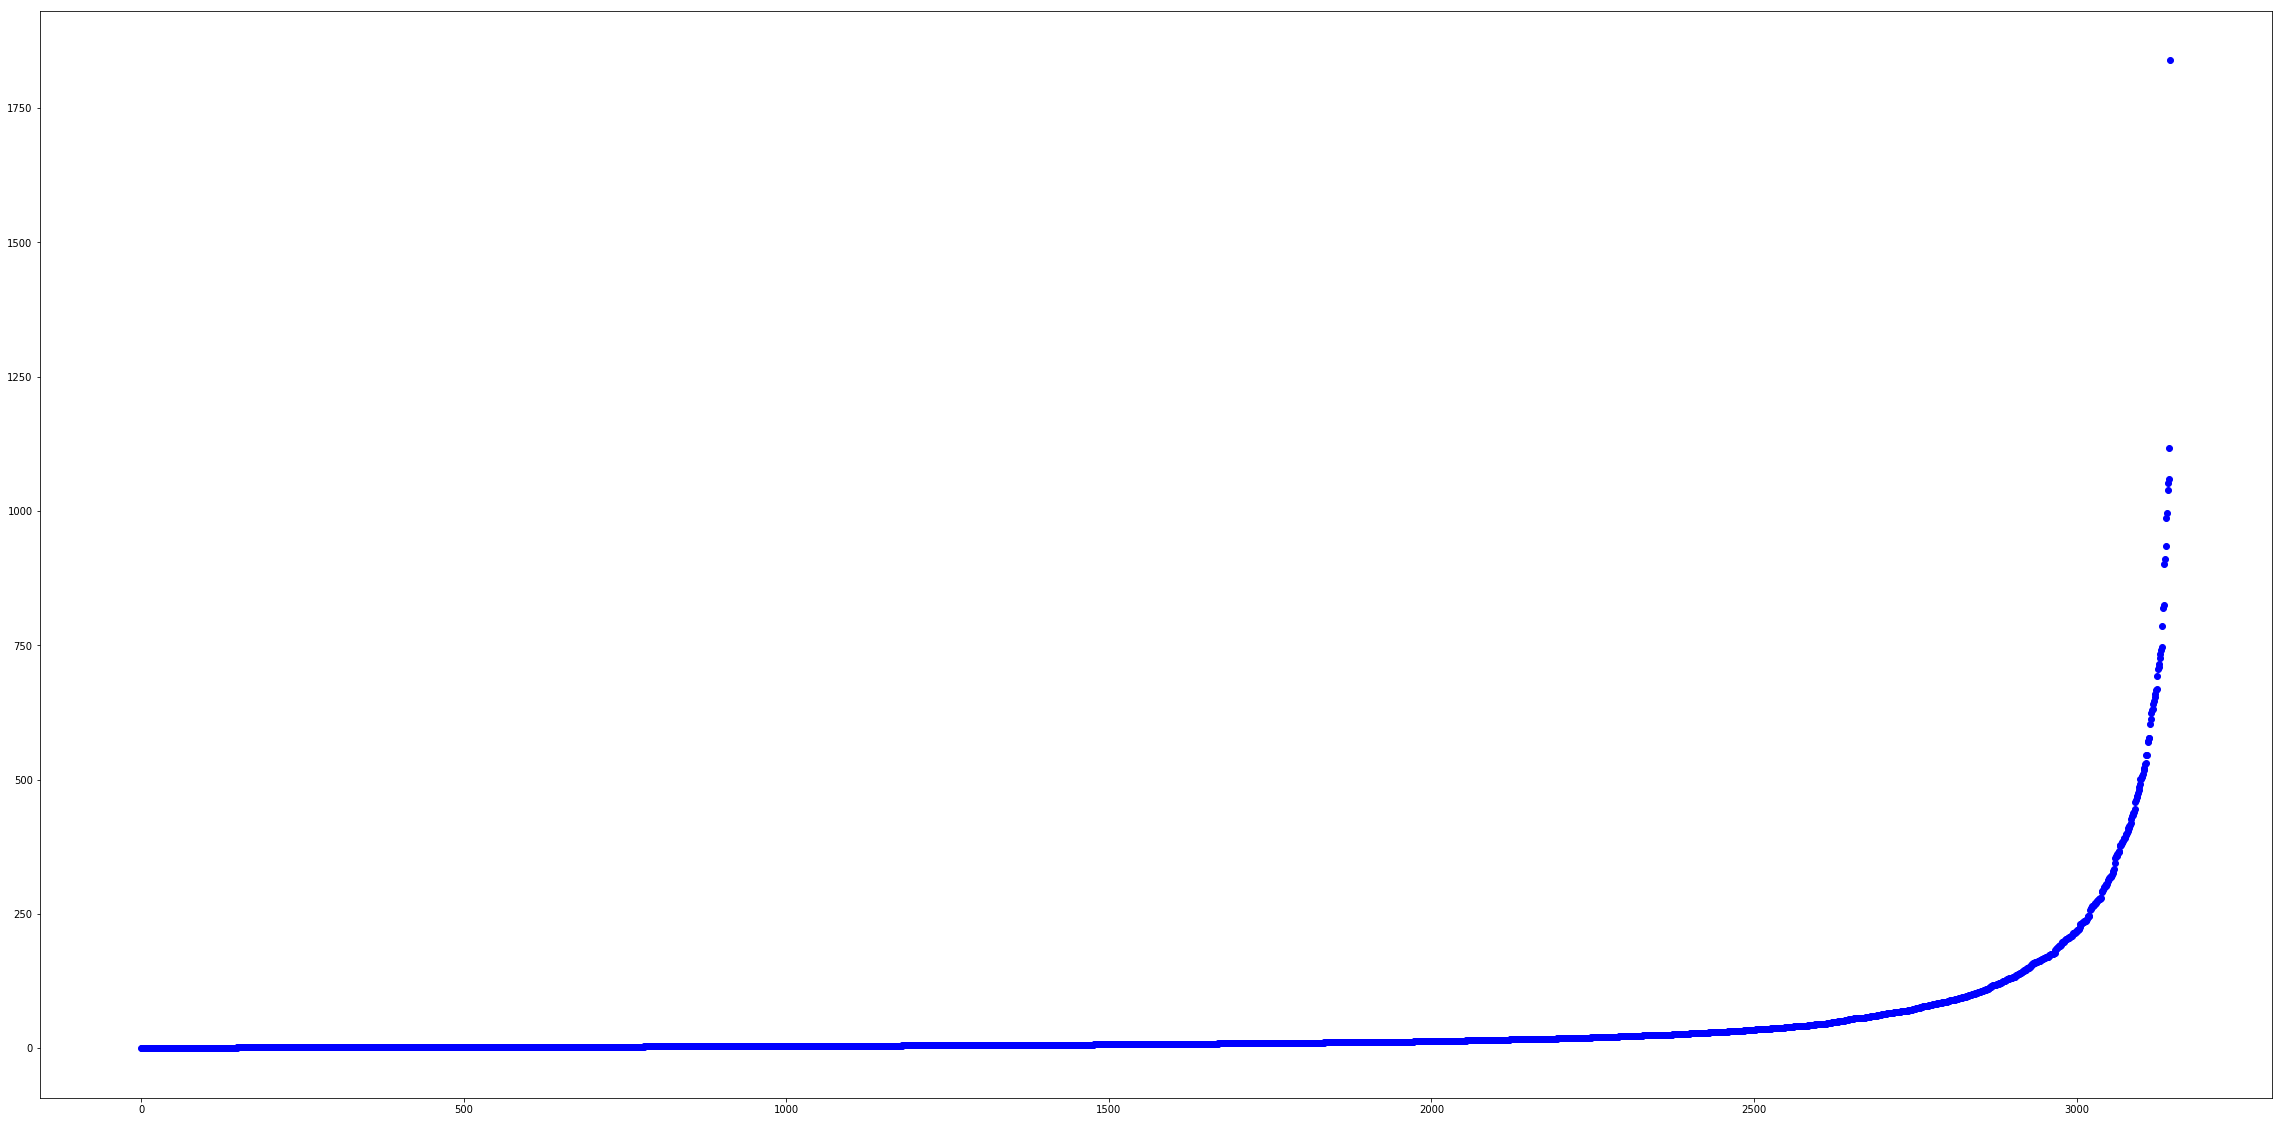

In [8]:
plt.figure(figsize=(40, 20))
plt.plot(eigenvalues, 'bo')

In [9]:
eigenvalues[eigenvalues == 0]

array([-0., -0., -0.,  0.,  0.,  0.,  0.])

**Your answer here.**

How many connected components are there in your graph? Answer using the eigenvalues only.

In [10]:
print('There are', len(eigenvalues[eigenvalues == 0]), 'connected components.')

There are 7 connected components.


Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

Yes there is an upper bound on the eigenvalues. For the combinatorial laplacian, the largest possible eigenvalue is $\lambda_N=N$, for the normalized laplacian it is $\lambda_N=2$

## 3 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

We use Laplacian eigenmaps or more generally graph embeddings for dimensionality reduction and visualizing the similarity graph. That graph is embedded in a high dimensional space. Because we cannot visualize such an high-dimensional space, we want to embed the graph in a 2D or 3D space and still be able to preserve certain properties.

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one you prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

Text(0.5,1,'Embedding with Combinatorial Laplacian')

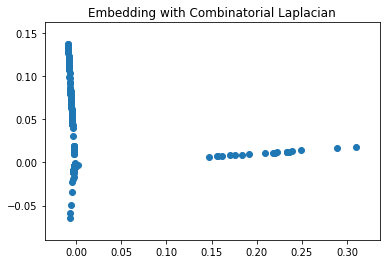

In [12]:
#load the largest connected component adjacency
largest_adjacency=np.load('../data/largest_connected_component_adjacency.npy')
# Here W = adjacency
D_largest = np.diag(np.sum(largest_adjacency, axis=0))
D_largest_sqrt_inv = np.sqrt(np.linalg.inv(D_largest))
#Laplacian of the largest connected component
laplacian_combinatorial_largest = D_largest  - largest_adjacency
laplacian_normalized_largest = D_largest_sqrt_inv.dot(laplacian_combinatorial_largest).dot(D_largest_sqrt_inv)

#embedding in two dimensions without renormalizing the eigenvectors
#for efficient storage and computation, we use the CSR format
laplacian_combinatorial_largest = sparse.csr_matrix(laplacian_combinatorial_largest)
#to convert to float the laplacian matrix : 
laplacian_combinatorial_largest=laplacian_combinatorial_largest.astype(float)
#for the partial eigendecomposition, we use  eigsh as our matrix is sparse and Hermitian (real symmetric)
#we limit the eigendecomposition to the 5 smallest eigenvectors by passing which='SM'
eigval_largest_combinatorial, eigvect_largest_combinatorial = sparse.linalg.eigsh(laplacian_combinatorial_largest, k=5,which='SM')

#to embed the graph, we use the value of the eigenvectors as coordinates. We take the 2 smallest non zero eigenvalues :  
x = eigvect_largest_combinatorial[:, 1]
y = eigvect_largest_combinatorial[:, 2]
plt.scatter(x, y)
plt.title('Embedding with Combinatorial Laplacian')


Text(0.5,1,'Embedding with Normalized Laplacian')

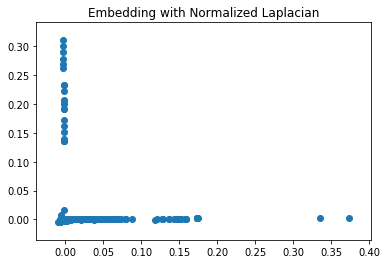

In [13]:
#same embedding with normalized eigenvectors
laplacian_normalized_largest = sparse.csr_matrix(laplacian_normalized_largest)
(eigval_largest_normalized, eigvect_largest_normalized) = sparse.linalg.eigsh(laplacian_normalized_largest,k=5,which='SM')
x_normalized = eigvect_largest_normalized[:, 1]
y_normalized = eigvect_largest_normalized[:, 2]
plt.scatter(x_normalized, y_normalized)
plt.title('Embedding with Normalized Laplacian')

Plot the nodes embedded in 2D. Comment on what you see.

Text(0.5,1,'Embedding with Combinatorial Laplacian')

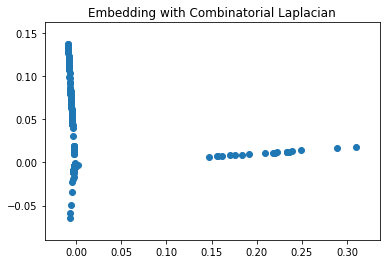

In [14]:
#we keep the embedding without renormalizing the vectors
plt.scatter(x, y)
plt.title('Embedding with Combinatorial Laplacian')

Two clusters are clearly displayed in the 2D embedding. One cluster (the cluster on the right) concerns small regional airports mainly in Greenland. The other cluster on the left concerns bigger airports that are connected between them. Very few airports of the first cluster are connected to airports of the second cluster. 

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

The embedding Z tries to preserve the similarity between data samples with the following formula.$$
\newcommand{\x}{\mathbf{x}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\Y}{\mathbf{Y}}
\newcommand{\L}{\mathbf{L}}
\newcommand{\D}{\mathbf{D}}
\newcommand{\I}{\mathbf{I}}
\arg\min_{\y_1,\ldots,\y_N}\sum_{i\sim j}w_{ij}\|\y_i - \y_j\|_2^2
= \arg\min_{\Y \in \mathbb{R}^{N \times d}}
\operatorname{tr}(\Y^\intercal \L \Y) \text{ , so that } \Y^\intercal \Y = \I,
$$ where $\y_i$ is the coordinate vector in the $d$-dimensional space of the $i$-th data point. It requires that $\y_i$ and $\y_j$ are close together if the corresponding data points $\x_i$ and $\x_j$ are strongly connected, which means that their similarity $w_{ij}$ is large. 


## 2 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

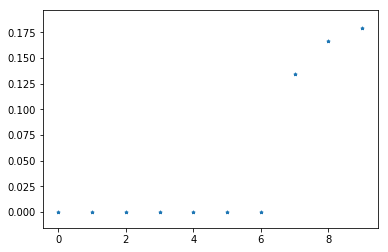

In [15]:
rg = range(len(eigenvalues))
plt.scatter(rg[:10], eigenvalues[:10], marker='*', s=10)

To determine k we looked at the laplacian spectrum (shown above). There is a big gap in the laplacian spectrum between $\lambda_k$ and $\lambda_{k+1}$. As shown above, we find k=7. The number of clusters k is also equal to the multiplicity of the eigenvalue 0. That's what we did at the question 6, we also find k=7.
Then we can take k=d=7 as suggested during the lectures.



### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

In [24]:
# Your code here.
k=7
H=np.transpose(eigenvectors[0:7])
H_norm=np.transpose(eigenvectors[0:7])
for i in range (0, len(H)) :
    H_norm[i]=H[i]/scipy.linalg.norm(H[i])
    
kmeans=KMeans(n_clusters=k).fit(H)
labels = kmeans.labels_
clust_centr=kmeans.cluster_centers_ 

kmeans_norm=KMeans(n_clusters=k).fit(H_norm)
labels_n = kmeans_norm.labels_
clust_centr_n=kmeans_norm.cluster_centers_ 

labels

array([2, 5, 6, ..., 1, 1, 1])

### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [95]:
reordered = np.zeros((n_nodes, n_nodes)).astype(int)

In [96]:
reordering = [(cluster_idx, node_nb) for (cluster_idx, node_nb) in zip(labels, np.array(range(0,n_nodes)))]
reordering.sort()
ordered_labels = [i for (i, j) in reordering]
new_order = [(prev_idx, new_idx) for (prev_idx, new_idx) in zip(np.array(range(0,n_nodes)), [j for (i, j) in reordering])]

In [97]:
for (prev_row, new_row) in new_order:
    for (prev_col, new_col) in new_order:
        reordered[prev_row, prev_col] = adjacency[new_row, new_col]

In [30]:
A=np.array(reordered)
l=np.array(ordered_labels)

a2=np.vstack((l,A.T))

#a2 = [cluster_of_points   A] 

a2



array([[2, 5, 6, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Your answer here.**

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).

In [ ]:
# Your code here.

### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

 We used the eigenvectors of the graph Laplacian as we wanted to gather the nodes that are close in the real graph to find the clusters. In this case, similarity is distance based. Therefore, we used the graph Laplacian as features to minimize $Tr(Y^{T}LY)$. This also allows us to have smooth partitions.
The constraint $Y^{T}Y=I$ prevents collapse onto a subspace of dimension less than m (we don't take the eigenvector corresponding to $\lambda_1=0$ as a feature).
 
Similarity between a pair of data points is due to different features. There are at least a few features on which the points are close to each other, so obvoulsy we can use other features for clustering.